# Loan_Approval

### Data Retrieving

importing The data Using Pandas and Displaying the resulting Dataframe.

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("lending_data.csv")
print(df.head())

   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0    10700.0          7.672            52800        0.431818                5   
1     8400.0          6.692            43600        0.311927                3   
2     9000.0          6.963            46100        0.349241                3   
3    10700.0          7.664            52700        0.430740                5   
4    10800.0          7.698            53000        0.433962                5   

   derogatory_marks  total_debt  loan_status  
0                 1       22800            0  
1                 0       13600            0  
2                 0       16100            0  
3                 1       22700            0  
4                 1       23000            0  


## Get dataset summary & numerical statistics

In [22]:
print(df.info()) 
print(df.describe()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB
None
          loan_size  interest_rate  borrower_income  debt_to_income  \
count  77536.000000   77536.000000     77536.000000    77536.000000   
mean    9805.562577       7.292333     49221.949804        0.377318   
std     2093.223153       0.889495      8371.635077        0.081519   
min     5000.000000       5.250000     30000.000000        0.000000   
25%     8700


## Shows missing values per column
     . If there is a missing numeric and Catagorical values Replace with  mean and moad respectivelly.

In [43]:
df.fillna(df.mean(), inplace=True)  
df.fillna(df.mode().iloc[0], inplace=True)
print("Missing Values After Handling:\n", df.isnull().sum())

Missing Values After Handling:
 loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64


# Data Preproccessing (Encoding & Scaling)
     . Since all columns in the dataset are numerical, we don't need categorical encoding. However, feature scaling is required.

In [46]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['loan_size', 'interest_rate', 'borrower_income', 
                  'debt_to_income', 'num_of_accounts', 'derogatory_marks', 
                  'total_debt']

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())


   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0   0.427304       0.426837         0.427404        0.668571         0.616143   
1  -0.671487      -0.674918        -0.671552       -0.802166        -0.434049   
2  -0.384846      -0.370249        -0.372922       -0.344424        -0.434049   
3   0.427304       0.417844         0.415459        0.655346         0.616143   
4   0.475078       0.456068         0.451295        0.694873         0.616143   

   derogatory_marks  total_debt  loan_status  
0          1.043996    0.427404            0  
1         -0.673973   -0.671552            0  
2         -0.673973   -0.372922            0  
3          1.043996    0.415459            0  
4          1.043996    0.451295            0  


##  Feature Selection & Splitting Data
         . Prepares data for training by splitting it into training and test sets.

In [49]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['loan_status'])  # Features
y = df['loan_status']  # Target variable (0 = Not Approved, 1 = Approved)

# Split into 80% training and 20% testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset shapes
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (62028, 7)
Testing Data Shape: (15508, 7)


# Predict Model Performance
     . I predict that the Random Forest Classifier will outperform Logistic Regression. The reason behind my prediction is that Random Forests can determine feature importance by analyzing how often each feature is selected across multiple decision trees. This ability allows the model to handle complex relationships between variables, which I believe will contribute to better overall performance compared to Logistic Regression, which assumes a linear relationship between features. later compare it with the actual model results.

# Train Machine Learning Models
      

   * Logistic Regression Model 

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression model
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
print(classification_report(y_test, y_pred_log))


Training Data Score: 0.9939865867027794
Testing Data Score: 0.994712406499871
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.98      0.92       497

    accuracy                           0.99     15508
   macro avg       0.94      0.99      0.96     15508
weighted avg       1.00      0.99      0.99     15508



    * Random Forest Model

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
clf = RandomForestClassifier(random_state=42, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')
print(classification_report(y_test, y_pred_rf))

Training Score: 0.9970658412329916
Testing Score: 0.9927779210729946
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15011
           1       0.87      0.89      0.88       497

    accuracy                           0.99     15508
   macro avg       0.93      0.94      0.94     15508
weighted avg       0.99      0.99      0.99     15508



 #### The Logistic Regression model had a score of 0.9947 and the Random Forest Classifier model had a score of 0.9927. Therefore, my prediction was incorrect, although only by a slim amount; the difference in scores is only around 0.002. It seems for this dataset, both models are very accurate in predicting the risk level of given loans.

#  Evaluate Model Performance

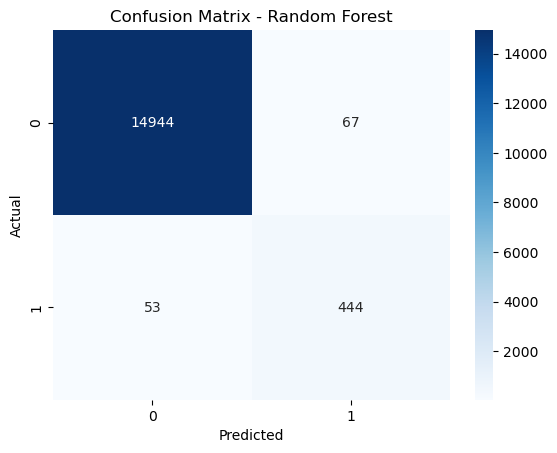

In [81]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


True Negatives (TN) = 14944 (Correctly predicted 0 as 0)

False Positives (FP) = 67 (Incorrectly predicted 1 as 0)

False Negatives (FN) = 53 (Incorrectly predicted 0 as 1)

True Positives (TP) = 444(Correctly predicted 1 as 1)

In [86]:
pip install fastapi uvicorn scikit-learn pandas

# Saving The Trainned Model

In [88]:
import joblib

# Save the trained Random Forest model
joblib.dump(rf_model, "random_forest_model.pkl")


['random_forest_model.pkl']

## Approval Probability

In [106]:

import pandas as pd

input_data = pd.DataFrame([[
    4000.0,   
    3.5,      
    150000.0, 
    0.10,     
    8,        
    0,       
    2000.0    
]], columns=X.columns)  

prob = rf_model.predict_proba(input_data)
print("Approval Probability:", prob[0][1])  



Approval Probability: 0.41833333333333333


## Importance features for Approval 

In [108]:
importances = rf_model.feature_importances_
feature_names = X.columns
sorted(zip(importances, feature_names), reverse=True)


[(0.33904464174698995, 'interest_rate'),
 (0.16819620748628641, 'borrower_income'),
 (0.15989338641796771, 'total_debt'),
 (0.14238129484090895, 'debt_to_income'),
 (0.1373689007673281, 'loan_size'),
 (0.053019859968405386, 'num_of_accounts'),
 (9.57087721135186e-05, 'derogatory_marks')]